# Correlation

Make a correlation map of all the symbols in a portfolio

In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd

import pinkfish as pf

# Format price data.
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# Set size of inline plots.
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

In [3]:
symbols = ['SPY', 'GLD', 'BOND', 'EEM', 'IYR', 
           'JNK', 'LQD', 'NLY',  'PFF', 'PGX',
           'SLY', 'TIP', 'TLT',  'BSV', 'VNQ']
#symbols = ['GLD', 'GDX']
#symbols = ['SPY', '^GSPC']
#symbols = ['LQD', 'TLT']

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime.now()

In [4]:
# Fetch timeseries
portfolio = pf.Portfolio()
ts = portfolio.fetch_timeseries(symbols, start, end, fields=['close'])

In [5]:
ts, start = portfolio.finalize_timeseries(ts, start)

,IYR,SLY,PFF,BSV,SPY,NLY,EEM,LQD,TLT,JNK,GLD,VNQ,PGX,BOND,TIP
IYR,1.00,0.79,0.61,0.31,0.81,0.71,0.58,0.51,0.23,0.73,0.27,1.00,0.51,0.42,0.37
SLY,0.79,1.00,0.74,0.14,0.89,0.63,0.67,0.42,0.11,0.77,0.16,0.80,0.63,0.30,0.27
PFF,0.61,0.74,1.00,0.18,0.70,0.55,0.51,0.50,0.30,0.72,0.16,0.61,0.96,0.41,0.32
BSV,0.31,0.14,0.18,1.00,0.23,0.30,0.19,0.79,0.74,0.47,0.61,0.31,0.17,0.85,0.80
SPY,0.81,0.89,0.70,0.23,1.00,0.64,0.70,0.48,0.12,0.82,0.26,0.81,0.58,0.35,0.33
NLY,0.71,0.63,0.55,0.30,0.64,1.00,0.49,0.46,0.27,0.63,0.25,0.70,0.48,0.41,0.42
EEM,0.58,0.67,0.51,0.19,0.70,0.49,1.00,0.36,0.07,0.65,0.44,0.58,0.44,0.28,0.25
LQD,0.51,0.42,0.50,0.79,0.48,0.46,0.36,1.00,0.85,0.71,0.52,0.51,0.48,0.89,0.80
TLT,0.23,0.11,0.30,0.74,0.12,0.27,0.07,0.85,1.00,0.40,0.41,0.23,0.31,0.84,0.75
JNK,0.73,0.77,0.72,0.47,0.82,0.63,0.65,0.71,0.40,1.00,0.39,0.73,0.65,0.57,0.52


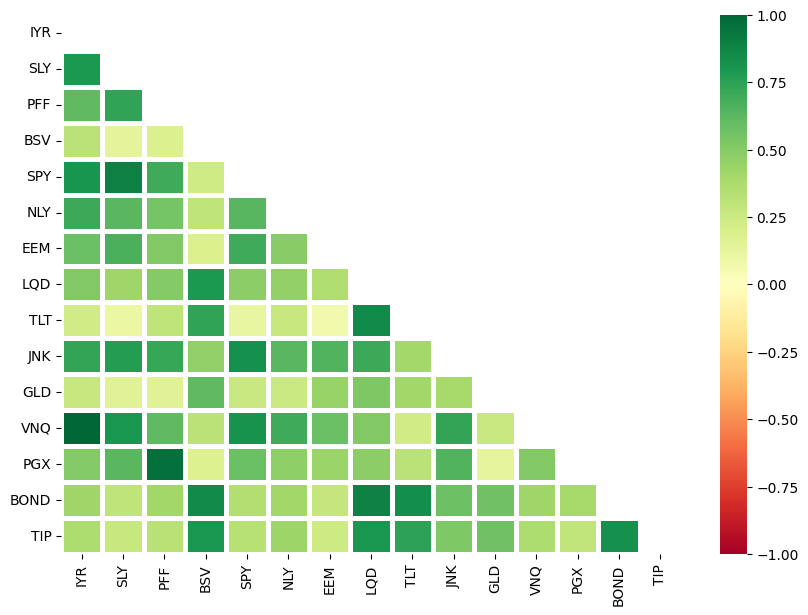

In [6]:
TRADING_DAYS_PER_YEAR, _, _ = pf.get_trading_days()
corr_df = portfolio.correlation_map(ts, method='log', days=TRADING_DAYS_PER_YEAR)
corr_df